<a href="https://colab.research.google.com/github/Nabanita29/Walmart/blob/main/Walmart_Product_Suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

file_path = '/content/Walmart Product Suggestion.xlsx'
df = pd.read_excel(file_path)

df.head()

,User ID,Product ID,Product Name,Interaction
0,User1,Prod1,Laptop,1
1,User1,Prod2,Smartphone,1
2,User1,Prod3,Headphones,0
3,User1,Prod4,Tablet,0
4,User1,Prod5,Speaker,1


<Axes: xlabel='Interaction', ylabel='User ID'>

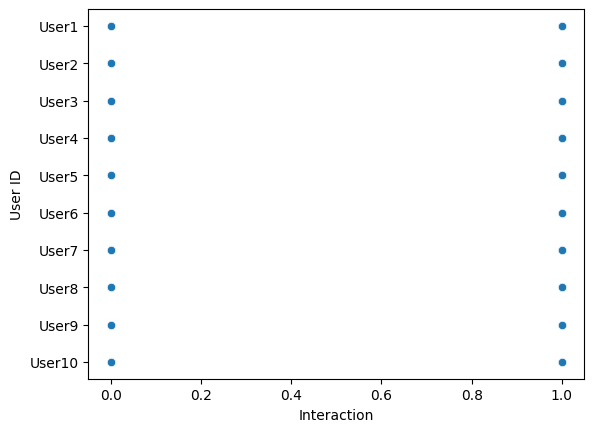

In [5]:
import seaborn as sns
sns.scatterplot( x = df['Interaction'], y = df['User ID'])

In [7]:
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = ['User ID','Product ID','Product Name']
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(df[columns_to_encode])


In [8]:
# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame after dropping the original columns
df_encoded = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

In [17]:
# The target variable y
X = df_encoded.drop('Interaction', axis = 1)
y = df.Interaction

In [18]:
from sklearn.model_selection import train_test_split
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5

Use Cross Validation to see which K value will be the best

In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [35]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy Score')

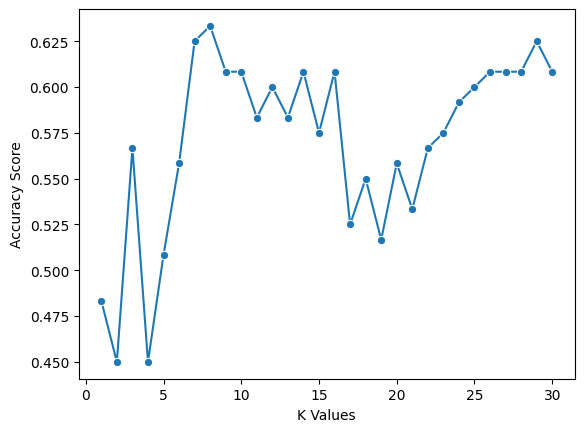

In [38]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [45]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [46]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.4166666666666667
Precision: 0.5
Recall: 0.35714285714285715


In [54]:
from sklearn import svm
from sklearn.metrics import classification_report

# Create a SVM Classifier
clf = svm.SVC(kernel='linear') # You can experiment with different kernels (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Accuracy: 0.5833333333333334
Precision: 0.6666666666666666
Recall: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.67      0.57      0.62        14

    accuracy                           0.58        24
   macro avg       0.58      0.59      0.58        24
weighted avg       0.60      0.58      0.59        24

